# Collaboration and Competition: Tennis

---

This notebook trains two DDPG agents collaboratively playing tennis.

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import time
from collections import deque
from agent import Agent
import workspace_utils
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


In [6]:
# Define two agents
agent1 = Agent(state_size=state_size, action_size=action_size, random_seed=0)
agent2 = Agent(state_size=state_size, action_size=action_size, random_seed=0)
agents = [agent1, agent2]

In [7]:
# DDPG implementation based on Udacity's bipedal code
def ddpg(n_episodes=4096, goal=0.5, print_every=100):
    scores = []
    scores_window = deque(maxlen=100)
    t_sum = 0 
    
    for i_episode in range(n_episodes):
        t_0 = time.time()
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent1.reset()
        agent2.reset()
        scores_episode = np.zeros(num_agents)
        steps = 0
        
        while True:
            action1 = agent1.act(states[0])            
            action2 = agent2.act(states[1]) 
            actions = [action1, action2]
            env_info = env.step(actions)[brain_name]
            
            next_states = env_info.vector_observations
            rewards = env_info.rewards                         
            dones = env_info.local_done                       
            
            agent1.step(states[0], actions[0], rewards[0], next_states[0], dones[0])
            agent2.step(states[0], actions[0], rewards[0], next_states[0], dones[0])
            
            states = next_states
            scores_episode += rewards
            steps += 1
            if np.any(dones):                               
                break
                
        score = np.max(scores_episode)
        scores.append(score)
        scores_window.append(score)
        avg = np.mean(scores_window)            
        t_delta = time.time() - t_0
        t_sum += t_delta 
        if i_episode % print_every == 0:
            print('Episode: {}\tScore: {:.2f}\tAvg: {:.2f}\tTook: {:.2f}sec\tTotal: {:.2f}min\tSteps: {}'.format(i_episode, score, avg, t_delta, t_sum/60, steps))
        if avg > goal:
            print("\n\nSolved in {} episodes with {:.2f} avg score after {:.2f}min.".format(i_episode, avg, t_sum/60))
            torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
            torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
            torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
            break

    return scores

In [8]:
# Starts the training
from workspace_utils import active_session
 
with active_session():
    scores = ddpg()

Episode: 0	Score: 0.00	Avg: 0.00	Took: 0.13sec	Total: 0.00min	Steps: 15
Episode: 100	Score: 0.00	Avg: 0.00	Took: 0.41sec	Total: 0.62min	Steps: 15
Episode: 200	Score: 0.00	Avg: 0.01	Took: 0.42sec	Total: 1.33min	Steps: 14
Episode: 300	Score: 0.00	Avg: 0.01	Took: 0.39sec	Total: 2.04min	Steps: 14
Episode: 400	Score: 0.00	Avg: 0.00	Took: 0.37sec	Total: 2.70min	Steps: 14
Episode: 500	Score: 0.00	Avg: 0.00	Took: 0.37sec	Total: 3.36min	Steps: 14
Episode: 600	Score: 0.00	Avg: 0.00	Took: 0.40sec	Total: 4.02min	Steps: 15
Episode: 700	Score: 0.10	Avg: 0.02	Took: 0.83sec	Total: 4.86min	Steps: 31
Episode: 800	Score: 0.00	Avg: 0.02	Took: 0.38sec	Total: 5.65min	Steps: 14
Episode: 900	Score: 0.00	Avg: 0.00	Took: 0.37sec	Total: 6.32min	Steps: 14
Episode: 1000	Score: 0.00	Avg: 0.04	Took: 0.85sec	Total: 7.32min	Steps: 32
Episode: 1100	Score: 0.00	Avg: 0.04	Took: 0.38sec	Total: 8.31min	Steps: 14
Episode: 1200	Score: 0.00	Avg: 0.03	Took: 0.34sec	Total: 9.15min	Steps: 13
Episode: 1300	Score: 0.00	Avg: 0.07	T

In [9]:
env.close()

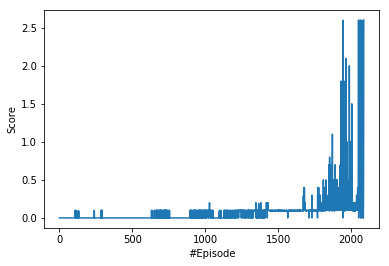

In [10]:
# Plot results
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('#Episode')
plt.show()